# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [46]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [47]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [51]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [55]:
tab['sick_mean'] = tab[1]/tab["All"]
tab['sick_odds'] = tab[1]/tab[0]
tab['sick_odds_ratio'] = tab['sick_odds']/tab.loc['All', 'sick_odds']
tab['logito'] = np.log(tab['sick_odds'])
tab['WOE'] = np.log(tab['sick_odds_ratio'])
tab.head()

flag_doente,0,1,All,sick_mean,sick_odds,sick_odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [150]:
cat_age = pd.qcut(x = df['age'], q=5)


df['cat_age'] = cat_age
mean_age_cut = df.groupby('cat_age')['age'].mean()
gb_age = df.groupby('cat_age')
tab_age = pd.crosstab(df['cat_age'], df['flag_doente'], margins=True)
tab_age

C:\Users\Matheus\AppData\Local\Temp\ipykernel_3724\2646220617.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_age_cut = df.groupby('cat_age')['age'].mean()
C:\Users\Matheus\AppData\Local\Temp\ipykernel_3724\2646220617.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_age = df.groupby('cat_age')


flag_doente,0,1,All
cat_age,,,
"(28.999, 45.0]",47,16,63
"(45.0, 53.0]",42,22,64
"(53.0, 58.0]",32,39,71
"(58.0, 62.0]",13,32,45
"(62.0, 77.0]",30,30,60
All,164,139,303


In [154]:
tab_age['sick_mean'] = tab_age[1]/tab_age["All"]
tab_age['sick_odds'] = tab_age[1]/tab_age[0]
tab_age['sick_odds_ratio'] = tab_age['sick_odds']/tab_age.loc['All', 'sick_odds']
tab_age['logito'] = np.log(tab_age['sick_odds'])
tab_age['WOE'] = np.log(tab_age['sick_odds_ratio'])
tab_age['mean_age'] = medium_age_cut
tab_age.head()

flag_doente,0,1,All,sick_mean,sick_odds,sick_odds_ratio,logito,WOE,mean_age
cat_age,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667


In [85]:
# cat_age = pd.qcut(x = df['age'], q=5)
# df['cat_age'] = cat_age
# gb_age = df.groupby('cat_age').agg({})
# gb_age.head()


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

In [156]:
tab_age['interval_age'] = tab_age.index
tab_age.head()

flag_doente,0,1,All,sick_mean,sick_odds,sick_odds_ratio,logito,WOE,mean_age,interval_age
cat_age,,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222,"(28.999, 45.0]"
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000,"(45.0, 53.0]"
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268,"(53.0, 58.0]"
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556,"(58.0, 62.0]"
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667,"(62.0, 77.0]"


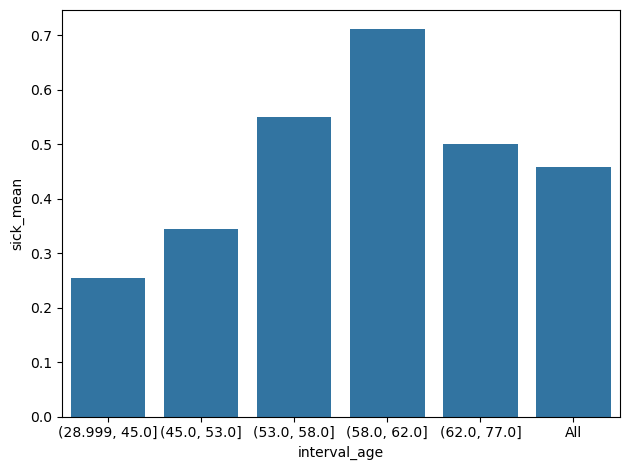

In [164]:
fig, ax = plt.subplots()
ax = sns.barplot(x=tab_age['interval_age'], y= tab_age['sick_mean'])
plt.tight_layout()
plt.show()